# Forcing fields

This notebooks serves to show the different forced fields used by the models. In particular ERA40/JRA25 and the averaged versions together with the CORE2 forcing

In [1]:
from scipy.io import netcdf
import numpy as np
from pylab import clf, plot, show, floor, ceil, imshow
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
#xlabel, ylabel, legend, savefig, colorbar, title, clim, pcolor, cm, contourf
import os
import csv
import sys
import glob
from netCDF4 import Dataset

from IPython.display import display, Math, Latex, Image
from mpl_toolkits.basemap import Basemap
import mpl_toolkits

sys.path.append('/noc/users/am8e13/PyNGL-1.4.0/lib/python2.7/site-packages/PyNGL/')
import Ngl
sys.path.append('/noc/users/am8e13/Python/')
import komod
sys.path.append('/noc/users/am8e13/Python/PyNIO-1.4.0/')
import Nio

from python_functions import *
import cmocean
import random
import calendar

from IPython.html.widgets import interact, interactive
from IPython.display import clear_output, display, HTML

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [ ]:
def read_forcing(path,dataset,init_year,tot_years):
    # This function is meant to read and store the forcing fields
    # Load adata files
    xdim = 320
    ydim = 160
    tdim = [365*4,366*4]

    data = {'v10m': np.zeros(360*tot_years) , 'u10m' : np.zeros(360*tot_years), \
            'rain': np.zeros(360*tot_years) , 'dlw' : np.zeros(360*tot_years) , \
            'dsw' : np.zeros(360*tot_years) , 'tmp2m_degC' : np.zeros(360*tot_years) , \
            'spfh2m' : np.zeros(360*tot_years), 'rain': np.zeros(360*tot_years)}

    data_all = {'v10m': np.zeros(360*tot_years*4) , 'u10m' : np.zeros(360*tot_years*4), \
                'rain': np.zeros(360*tot_years*4) , 'dlw' : np.zeros(360*tot_years*4) , \
                'dsw' : np.zeros(360*tot_years*4) , 'tmp2m_degC' : np.zeros(360*tot_years*4) , \
                'spfh2m' : np.zeros(360*tot_years*4), 'rain': np.zeros(360*tot_years*4)}


    data_ave = {'v10m': np.zeros(360) , 'u10m' : np.zeros(360), 'rain': np.zeros(360), \
                'dlw' : np.zeros(360) , 'dsw' : np.zeros(360) , 'tmp2m_degC' : np.zeros(360) , \
                'spfh2m' : np.zeros(360), 'rain': np.zeros(360*33),}

    data_ave_all = {'v10m': np.zeros(360*4) , 'u10m' : np.zeros(360*4), 'rain': np.zeros(360*4), \
                'dlw' : np.zeros(360*4) , 'dsw' : np.zeros(360*4) , 'tmp2m_degC' : np.zeros(360*4) , \
                'spfh2m' : np.zeros(360*4), 'rain': np.zeros(360*4),}

    for var in data:
        data_av = []
        #print "Now reading:"+str(var)
        for year in range(tot_years):
            if calendar.isleap(init_year+year):
                tdim_ly = 1
                n_pop = 6
            else:
                tdim_ly = 0
                n_pop = 5

            name = path+dataset+str(var)+'_'+str(init_year+year)
            data_read = komod.mitbin(name,xdim=xdim,ydim=ydim,zdim=1,tdim=tdim[tdim_ly],datatype='float32')
            data_av_temp = np.mean(np.mean(data_read,axis = 3),axis = 2).squeeze(axis = 1)        
            to_pop = random.sample(range(len(data_av_temp)), 4*n_pop)
            data_av_temp = np.delete(data_av_temp,to_pop,0) 
            data_all[var]=data_av_temp
            # Daily average for plotting purpose
            data_av_temp_daily = np.zeros(360)
            for day in range(360):
                data_av_temp_daily[day] = np.mean(data_av_temp[day*4 : day*4 +4])
                
            data_av = np.concatenate([data_av,data_av_temp_daily])
            data[var] = data_av

        name = path+dataset+str(var)+'_average'
        data_read = komod.mitbin(name,xdim=xdim,ydim=ydim,zdim=1,tdim=360*4,datatype='float32')
        data_climy_av = np.mean(np.mean(data_read,axis = 3),axis = 2).squeeze(axis = 1)
        data_ave_all[var]=data_climy_av  
        data_climy_av_daily = np.zeros(360)
        for day in range(360):
            data_climy_av_daily[day] = np.mean(data_climy_av[day*4 : day*4 +4])

        data_climy_33_years = []
        for year in range(tot_years):
            data_climy_33_years = np.concatenate([data_climy_33_years, data_climy_av_daily])

        data_ave[var] = data_climy_33_years
        
    clim = {'data' : data , 'data_all' : data_all , 'data_ave' : data_ave , 'data_ave_all' : data_ave_all}
    
    print 'read '+dataset
        
    return clim


In [2]:
NCEP = read_forcing('/scratch/general/am8e13/NCEP_data/','cube78_',1992,16)   
ERA = read_forcing('/scratch/general/am8e13/forcing/ERA_data/','ERA40g_',1979,23)
JRA = read_forcing('/scratch/general/am8e13/forcing/JRA_data/','jra25_',1979,24)
CORE2,time_core = read_core('/scratch/general/am8e13/forcing/CORE2_data/')
titles, unity = dataset_unity()

read cube78_
read ERA40g_
read jra25_
read CORE2


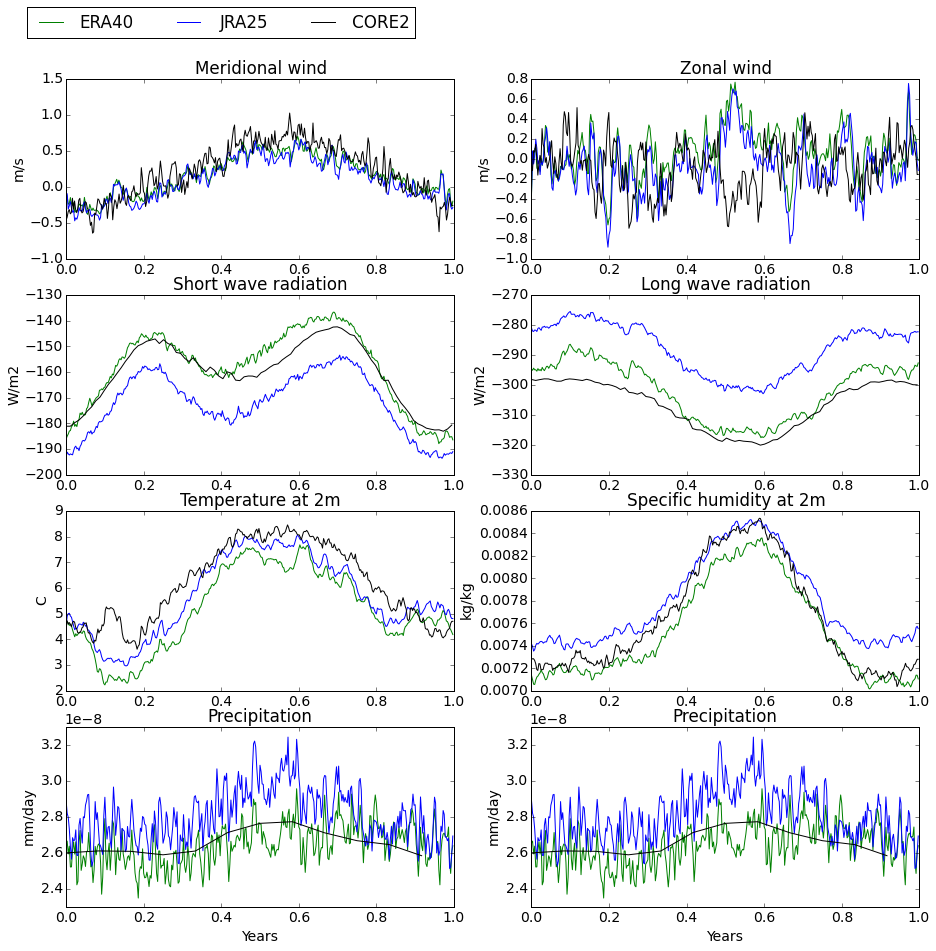

In [39]:
fig, axes = plt.subplots(4,2)
yp = 1
ax_ind = 0
ord_var = ['v10m','u10m','dsw','dlw','tmp2m_degC','spfh2m','rain','rain']
time = np.array(range(len(ERA['data']['v10m'])))/360.

for var in ord_var:
    if var == 'rain' or var == 'rain_new33':
        axes.flat[ax_ind].set_xlabel('Years')
    if var == 'rain_ne3':
        var='Et'
    else:        
        axes.flat[ax_ind].plot(time[0:360*yp],ERA['data'][var][0:360*yp],'green',label='ERA40')
        axes.flat[ax_ind].plot(time[0:360*yp],JRA['data'][var][0:360*yp],'blue',label='JRA25')
        #axes.flat[ax_ind].plot(time[0:360*yp],ERA['data_ave'][var][0:360*yp],'red', label = 'ERA40 ave')
        #axes.flat[ax_ind].plot(time[0:360*yp],JRA['data_ave'][var][0:360*yp],'purple', label = 'JRA25 ave')
        if var == 'rain':
            axes.flat[ax_ind].plot(time_core[var],CORE2['data_ave'][var],'black', label = 'CORE2')
        else:
            axes.flat[ax_ind].plot(time_core[var][0:-1:4],CORE2['data_ave'][var][0:-1:4],'black', label = 'CORE2')
        axes.flat[ax_ind].set_title(titles[var])
        axes.flat[ax_ind].set_ylabel(unity[var])
        ax_ind +=  1
    #yp = 4
plt.legend(bbox_to_anchor=(-1.3, 3.5, 1., 1.5),ncol=4, mode="expand", borderaxespad=0.)
fig.subplots_adjust(right=2.1,top=3)

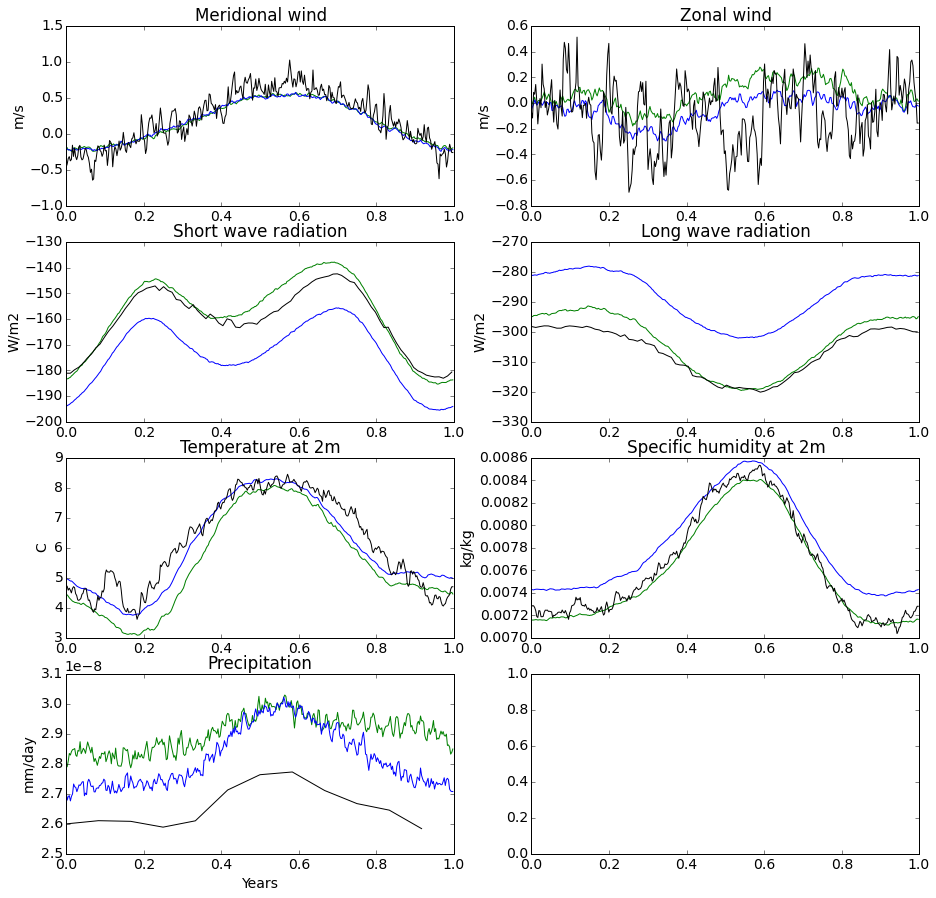

In [46]:
fig, axes = plt.subplots(4,2)
yp = 1
ax_ind = 0
ord_var = ['v10m','u10m','dsw','dlw','tmp2m_degC','spfh2m','rain']
time = np.array(range(len(ERA['data']['v10m'])))/360.

for var in ord_var:
    if var == 'rain' or var == 'rain_new33':
        axes.flat[ax_ind].set_xlabel('Years')
    if var == 'rain_ne3':
        var='Et'
    else:        
        axes.flat[ax_ind].plot(time[0:360*yp],ERA['data'][var][0:360*yp],'green',label='ERA40')
        axes.flat[ax_ind].plot(time[0:360*yp],JRA['data'][var][0:360*yp],'blue',label='JRA25')
        axes.flat[ax_ind].plot(time[0:360*yp],ERA['data_ave'][var][0:360*yp],'green', label = 'ERA40 ave')
        axes.flat[ax_ind].plot(time[0:360*yp],JRA['data_ave'][var][0:360*yp],'blue', label = 'JRA25 ave')
        if var == 'rain':
            axes.flat[ax_ind].plot(time_core[var],CORE2['data_ave'][var],'black', label = 'CORE2')
        else:
            axes.flat[ax_ind].plot(time_core[var][0:-1:4],CORE2['data_ave'][var][0:-1:4],'black', label = 'CORE2')
        axes.flat[ax_ind].set_title(titles[var])
        axes.flat[ax_ind].set_ylabel(unity[var])
        ax_ind +=  1
    #yp = 4
#plt.legend(bbox_to_anchor=(-1.3, 3.5, 1., 1.5),ncol=4, mode="expand", borderaxespad=0.)
plt.legend(loc = 'lower center', bbox_to_anchor = (0,-0.1,1,1),
            bbox_transform = plt.gcf().transFigure )
fig.subplots_adjust(right=2.1,top=3)

The following code produces the plot figure "Era ave"

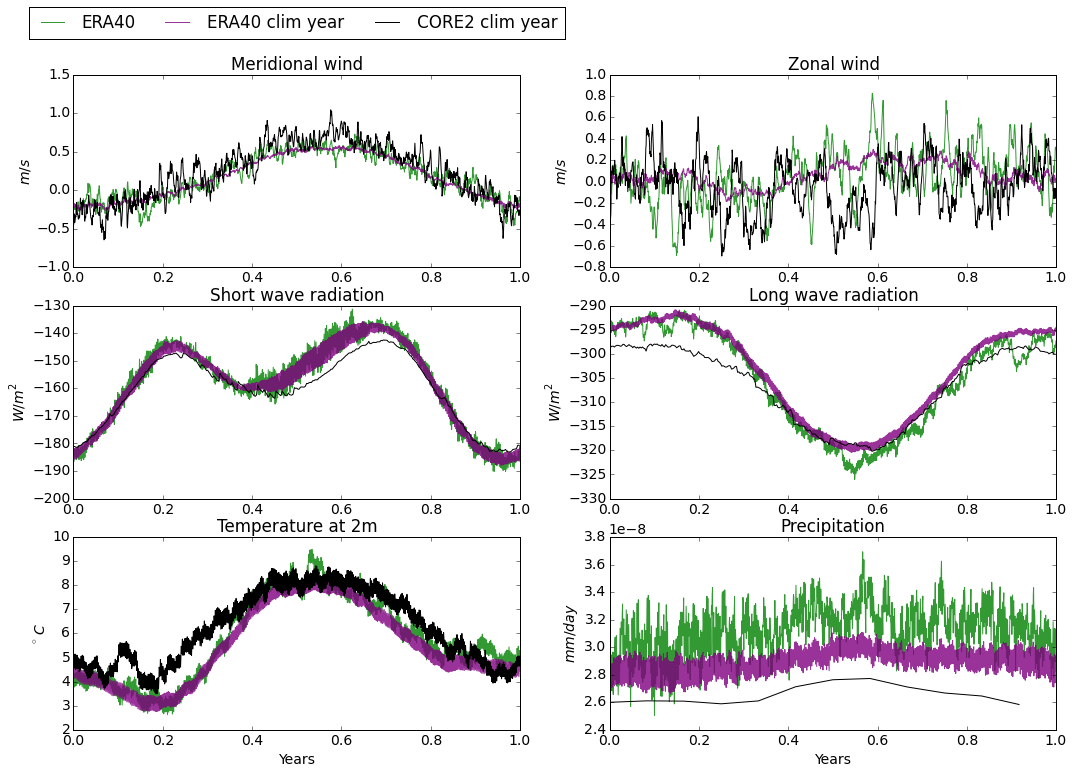

In [98]:
fig, axes = plt.subplots(3,2)
yp =1
start = 10
ax_ind = 0
ord_var = ['v10m','u10m','dsw','dlw','tmp2m_degC','rain']
time = np.array(range(len(ERA['data']['v10m'])))/(4*360.)

for var in ord_var:
    if var == 'rain' or var == 'rain_new33' or var == 'tmp2m_degC':
        axes.flat[ax_ind].set_xlabel('Years')
    if var == 'rain_ne3':
        var='Et'
    else:        
        axes.flat[ax_ind].plot(time[0:360*yp*4],ERA['data_all'][var][0:360*yp*4],'green',label='ERA40',alpha=0.8)
        #axes.flat[ax_ind].plot(time[0:360*yp],JRA['data'][var][0:360*yp],'blue')
        #axes.flat[ax_ind].plot(time[0:360*yp],NCEP['data'][var][0:360*yp],'green')
        axes.flat[ax_ind].plot(time[0:360*yp*4],ERA['data_ave_all'][var][0:360*yp*4],'purple',label='ERA40 clim year',alpha=0.8)
        #axes.flat[ax_ind].plot(time[0:360*yp],JRA['data_ave'][var][0:360*yp],'purple')
        #axes.flat[ax_ind].plot(time[0:360*yp],NCEP['data_ave'][var][0:360*yp],'orange')
        axes.flat[ax_ind].plot(time_core[var],CORE2['data_ave'][var],'black',label='CORE2 clim year')
        axes.flat[ax_ind].set_title(titles[var])
        axes.flat[ax_ind].set_ylabel(unity[var])
        ax_ind +=  1
    #yp = 4
plt.legend(bbox_to_anchor=(-1.3, 2.25, 1.2, 1.5),ncol=4, mode="expand", borderaxespad=0.)
fig.subplots_adjust(right=2.4,top=2.4)

In [81]:
def dataset_unity():
    titles = {'v10m': 'Meridional wind' , 'u10m' : 'Zonal wind', 'rain_new33': 'Precipitation new33', \
            'dlw' : 'Long wave radiation' , 'dsw' : 'Short wave radiation' , 'tmp2m_degC' : 'Temperature at 2m' , \
            'spfh2m' : 'Specific humidity at 2m', 'rain': 'Precipitation'}
    unity = {'v10m': r"$m/s$" , 'u10m' : r"$m/s$", 'rain_new33': r"$mm/day$", \
            'dlw' : r"$W/m^2$" , 'dsw' : r"$W/m^2$" , 'tmp2m_degC' : r"$^{\circ}C$" , \
            'spfh2m' : r"$kg/kg", 'rain': r"$mm/day$"}
    return titles,unity
titles, unity = dataset_unity()

The following is to produce a nice picture of the model bathymetry

In [101]:
grid_toplot = grid_read(9)

In [105]:
1800*1382400/(60*60*360*24)

80

In [104]:
1935360*900/(60*60*360*24)

56